In [118]:
import warnings
warnings.filterwarnings("ignore")

# Práctica 2 Tipología y ciclo de vida de los datos

## Índice

1. Descripción del data set
2. Integración y selección de los datos de interés a analizar.
3. Limpieza de los datos y valores extremos
    1. Limpieza de datos
    2. Identificación y tratamiento de valores extremos
4. Análisis de los datos
    1. Selección de los grupos de datos
    2. Normalidad y homogeneidad de la varianza
    3. Pruebas estadisticas
5. Representación resultados
6. Resolución del problema

## 1. Descripción del data set

El dataset elegido es un conjunto de datos formado por la información recogida a través de los experimentos que se realizarón para detectar el boson de Higgs. Se quiere comprobar cuales son los atributos que más influyen para saber si es un boson o no.

En lo referente a la parte técnica de los datos, el conjunto de datos tiene un número de muestras (250000) suficientes para un primer estudio, el número de atributos por muestra (30) son bastantes para el uso de los diferentes algoritmos y reglas de asociación. Por otra parte, para el estudio tenemos dos clases objetivo, **b&nbsp;** (bosón de Higgs) y **s&nbsp;** (no bosón de Higgs).

## 2. Integración y selección de los datos de interés a analizar

Antes de realizar las taréas de límpieza y acondicionamiento, se hará un análisis del dataset y los párametros de este.

Importamos las librerías que vamos a necesitar para realizar el estudio.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import scipy

from sklearn import decomposition
from sklearn import linear_model

Primero cargamos los datos y visualizamos las 5 primeras filas para comprobar que se han cargado correctamente. Además, en la descripción del conjunto de datos se detalla que los valores *-999.000* se corresponden con valores nulos.

In [120]:
df = pd.read_csv('training.csv', na_values=[-999.000])
df.head()

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002           NaN                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1                   NaN               NaN                  NaN   
2                   NaN               NaN                  NaN   
3                   NaN               NaN                  NaN   
4                   NaN               NaN                  NaN   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0                 NaN   
4               3.891      16.405  ...            0                 NaN   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158                    NaN   
2                2.053               -2.028                    NaN   
3                  NaN                  NaN                    NaN   
4                  NaN                  NaN                    NaN   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                    1.24                  -2.475         113.497  0.002653   
1                     NaN                     NaN          46.226  2.233584   
2                     NaN                     NaN          44.251  2.347389   
3                     NaN                     NaN          -0.000  5.446378   
4                     NaN                     NaN           0.000  6.245333   

   Label  
0      s  
1      b  
2      b  
3      b  
4      b  

[5 rows x 33 columns]

Vamos a ver la dimensionalidad del dataset.

In [121]:
df.shape

(250000, 33)

Vemos que el dataset contiene 8036 filas y 14 columnas.

A continuación, veremos cada uno de los parámetros del conjunto de datos.

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
EventId                        250000 non-null int64
DER_mass_MMC                   211886 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           72543 non-null float64
DER_mass_jet_jet               72543 non-null float64
DER_prodeta_jet_jet            72543 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         72543 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_tau_phi    

Podemos ver que hay dos tipos de variables **númericas** **float64** (30) e **int64** (2) y además un tipo **object** que se corresponde con la clase. Para todas las columnas no hay el mismo número de registros no nulos, esto oscilan entre 72543 y 250000.

Eliminanos las columnas *EventId* y *Weight* del dataset ya que continen el identificador de cada fila y el peso asociado a la fila respectivamente. Ambas columnas no son atributos derivados del experimento.

In [123]:
df.drop(['EventId', 'Weight'], axis=1, inplace=True)

Ahora, veremos las características basicas de cada párametro.

In [124]:
df.describe()

DER_mass_MMC  DER_mass_transverse_met_lep   DER_mass_vis  \
count  211886.000000                250000.000000  250000.000000   
mean      121.858528                    49.239819      81.181982   
std        57.298157                    35.344886      40.828691   
min         9.044000                     0.000000       6.329000   
25%        91.885250                    19.241000      59.388750   
50%       112.406000                    46.524000      73.752000   
75%       135.482000                    73.598000      92.259000   
max      1192.026000                   690.075000    1349.351000   

            DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  250000.000000          72543.000000      72543.000000   
mean       57.895962              2.403735        371.783360   
std        63.655682              1.742226        397.699325   
min         0.000000              0.000000         13.602000   
25%        14.068750              0.882500        111.977000   
50%        38.467500              2.107000        225.885000   
75%        79.169000              3.690000        478.226000   
max      2834.999000              8.503000       4974.979000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep     DER_pt_tot     DER_sum_pt  \
count         72543.000000       250000.000000  250000.000000  250000.000000   
mean             -0.821688            2.373100      18.917332     158.432217   
std               3.584362            0.782911      22.273494     115.706115   
min             -18.066000            0.208000       0.000000      46.104000   
25%              -2.629000            1.810000       2.841000      77.550000   
50%              -0.244000            2.491500      12.315500     120.664500   
75%               0.958000            2.961000      27.591000     200.478250   
max              16.690000            5.684000    2834.999000    1852.462000   

       ...    PRI_met_phi  PRI_met_sumet    PRI_jet_num  PRI_jet_leading_pt  \
count  ...  250000.000000  250000.000000  250000.000000       150087.000000   
mean   ...      -0.010119     209.797178       0.979176           84.822105   
std    ...       1.812223     126.499506       0.977426           60.662276   
min    ...      -3.142000      13.678000       0.000000           30.000000   
25%    ...      -1.575000     123.017500       0.000000           44.422500   
50%    ...      -0.024000     179.739000       1.000000           65.561000   
75%    ...       1.561000     263.379250       2.000000          103.342000   
max    ...       3.142000    2003.976000       3.000000         1120.573000   

       PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
count        150087.000000        150087.000000           72543.000000   
mean             -0.003275            -0.012393              57.679474   
std               1.784546             1.813385              31.985782   
min              -4.499000            -3.142000              30.000000   
25%              -1.342000            -1.584000              37.312000   
50%               0.000000            -0.033000              47.902000   
75%               1.336000             1.562000              66.637000   
max               4.499000             3.141000             721.456000   

       PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt  
count            72543.000000            72543.000000   250000.000000  
mean                -0.011845               -0.001582       73.064591  
std                  2.031743                1.816950       98.015662  
min                 -4.500000               -3.142000        0.000000  
25%                 -1.612000               -1.576500        0.000000  
50%                 -0.010000               -0.002000       40.512500  
75%                  1.589500                1.576000      109.933750  
max                  4.500000                3.142000     1633.433000  

[8 rows x 30 columns]

Podemos calcular el valor medio del resto de variables para cuando *Label* valgan b y s. 

In [125]:
data = df.query('Label == "b"').mean()
data

DER_mass_MMC                   121.325369
DER_mass_transverse_met_lep     58.208042
DER_mass_vis                    81.596313
DER_pt_h                        49.047438
DER_deltaeta_jet_jet             1.888940
DER_mass_jet_jet               258.415169
DER_prodeta_jet_jet              0.127851
DER_deltar_tau_lep               2.366178
DER_pt_tot                      19.163180
DER_sum_pt                     145.630729
DER_pt_ratio_lep_tau             1.556785
DER_met_phi_centrality          -0.362495
DER_lep_eta_centrality           0.347744
PRI_tau_pt                      34.900855
PRI_tau_eta                     -0.010146
PRI_tau_phi                     -0.002396
PRI_lep_pt                      47.169168
PRI_lep_eta                     -0.020892
PRI_lep_phi                      0.038132
PRI_met                         41.183666
PRI_met_phi                     -0.019900
PRI_met_sumet                  197.419574
PRI_jet_num                      0.884929
PRI_jet_leading_pt              79

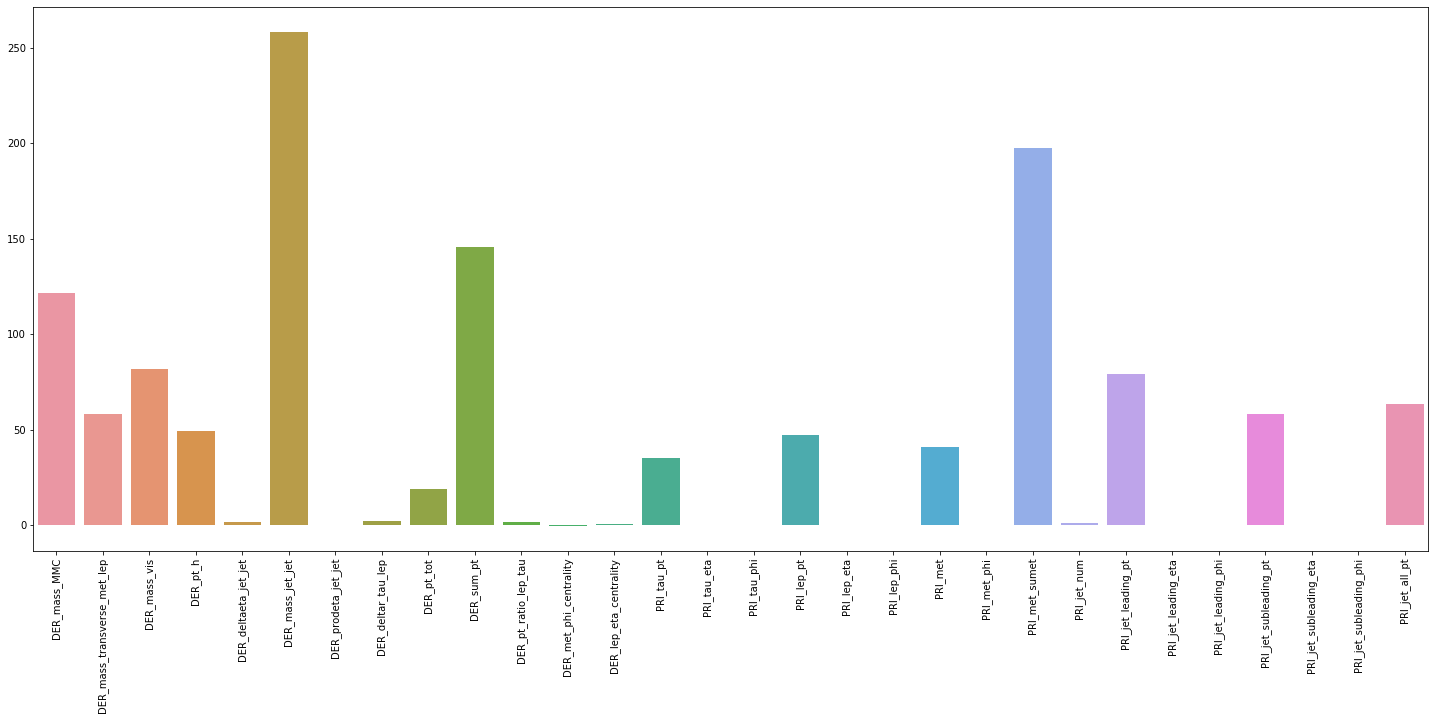

In [126]:
plt.figure(figsize=(25,10))
ax = sns.barplot(x=data.index.values, y=data.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

En la anterior imagen se puede ver la representación en una gráfica de barras de las medias de cada columna con respecto a la columna *Label* cuando es un boson de Higgs.

In [127]:
data = df.query('Label == "s"').mean()
data

DER_mass_MMC                   122.689202
DER_mass_transverse_met_lep     32.036287
DER_mass_vis                    80.387179
DER_pt_h                        74.869878
DER_deltaeta_jet_jet             3.039249
DER_mass_jet_jet               511.736244
DER_prodeta_jet_jet             -1.993892
DER_deltar_tau_lep               2.386378
DER_pt_tot                      18.445728
DER_sum_pt                     182.989011
DER_pt_ratio_lep_tau             1.208997
DER_met_phi_centrality           0.320938
DER_lep_eta_centrality           0.594759
PRI_tau_pt                      46.009462
PRI_tau_eta                     -0.012559
PRI_tau_phi                     -0.019249
PRI_lep_pt                      45.683880
PRI_lep_eta                     -0.016851
PRI_lep_phi                      0.053923
PRI_met                         42.740767
PRI_met_phi                      0.008644
PRI_met_sumet                  233.540845
PRI_jet_num                      1.159968
PRI_jet_leading_pt              92

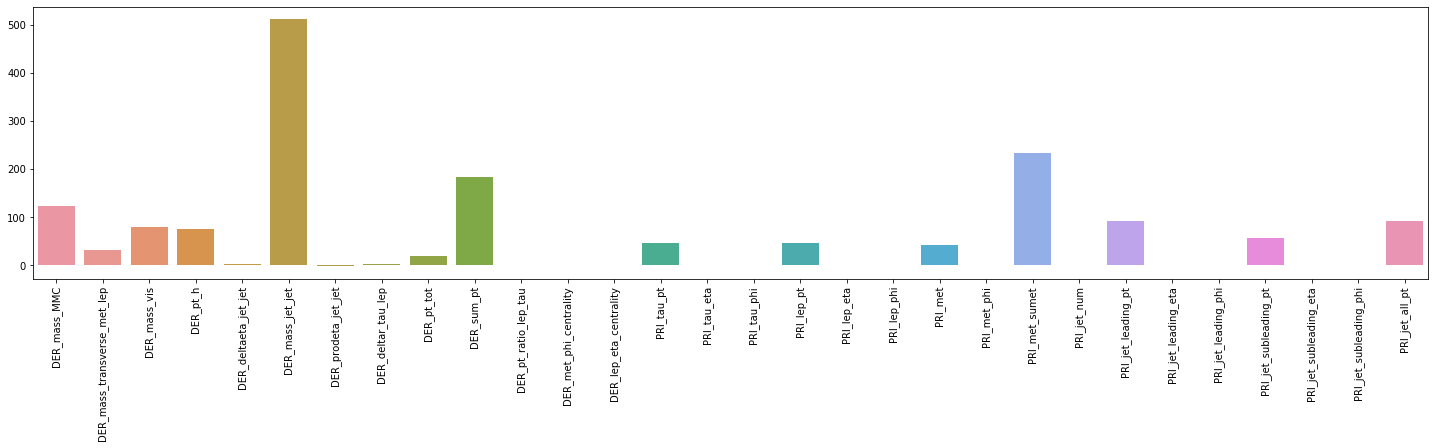

In [128]:
plt.figure(figsize=(25,5))
ax = sns.barplot(x=data.index.values, y=data.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

En la anterior imagen se puede ver la representación en una gráfica de barras de las medias de cada columna con respecto a la columna *Label* cuando no es un boson de Higgs.

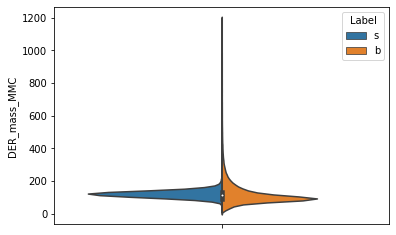

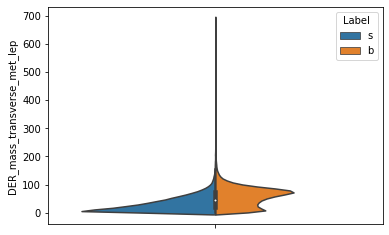

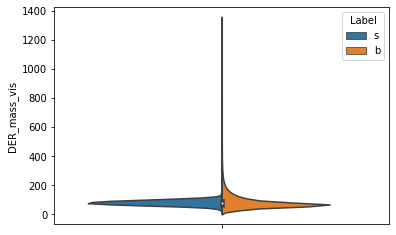

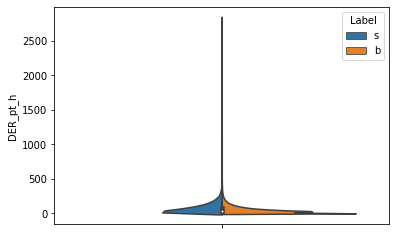

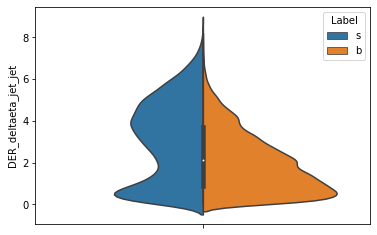

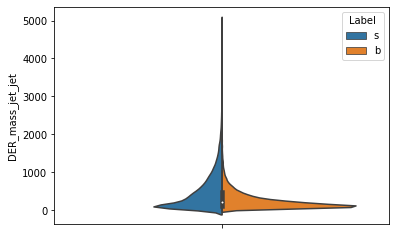

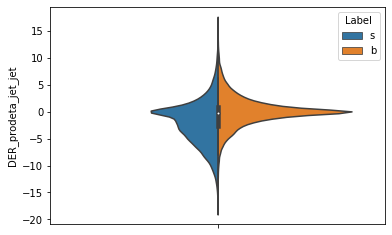

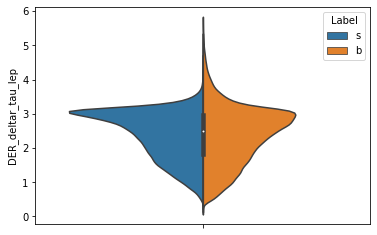

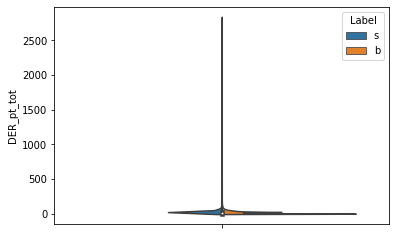

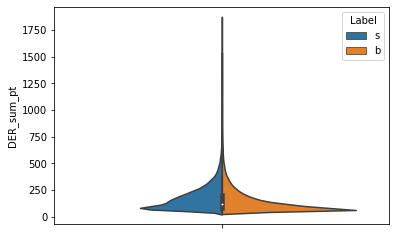

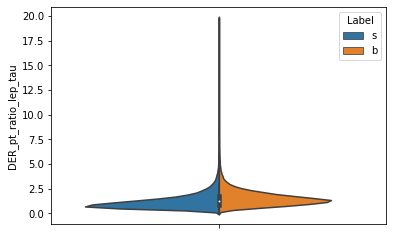

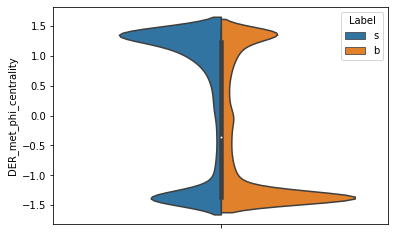

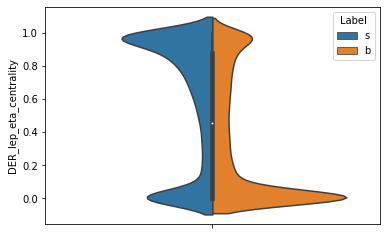

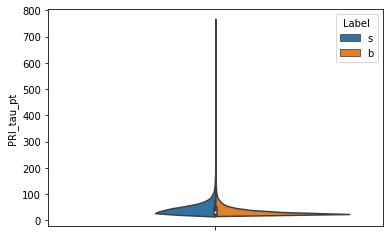

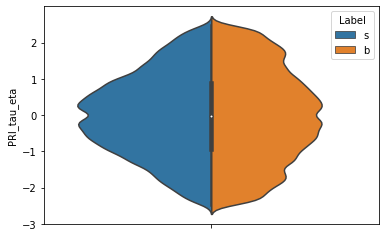

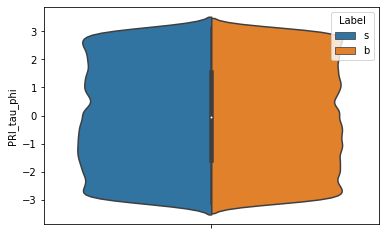

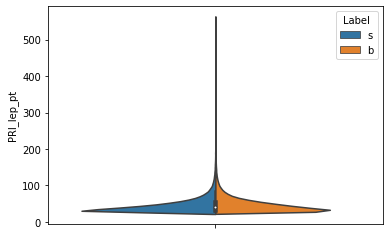

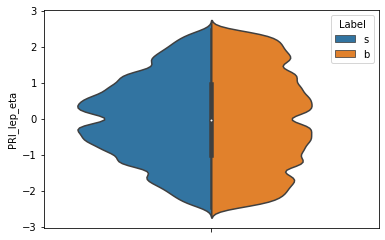

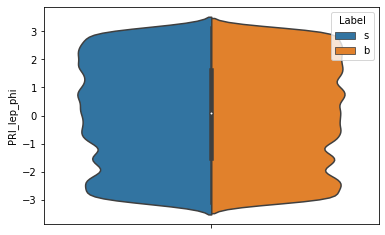

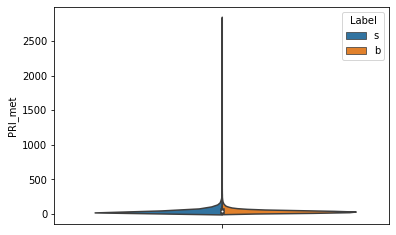

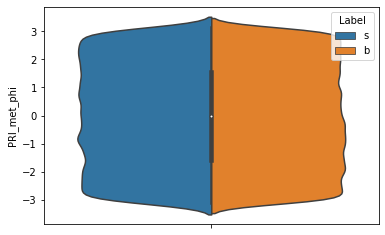

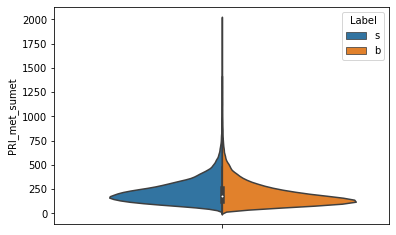

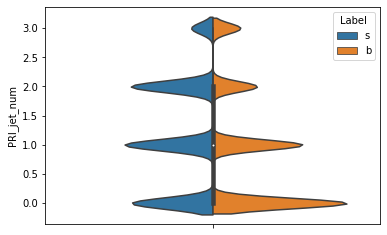

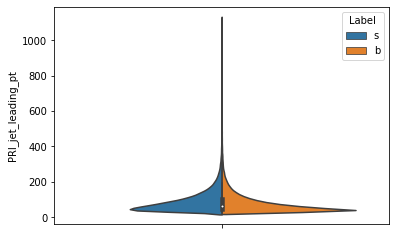

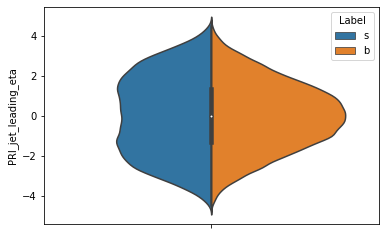

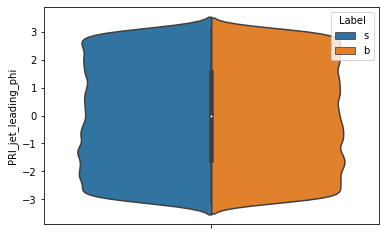

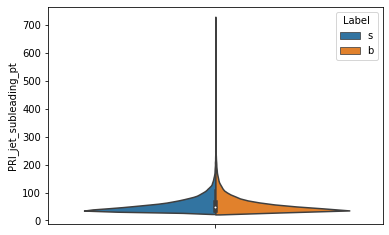

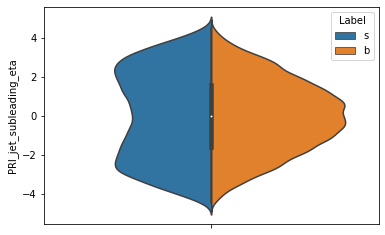

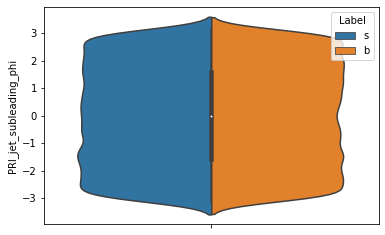

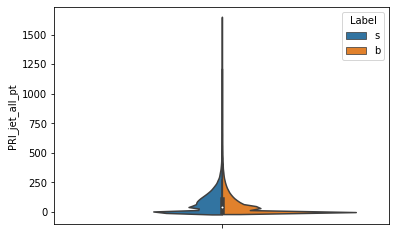

In [129]:
df['all'] = ''
for column in df.columns:
    if column not in ['Label', 'all']:
        ax = sns.violinplot(x='all', y=column, hue='Label', data=df, split=True)
        ax.set_xlabel('')
        plt.show()
del(df['all'])

En las imagenes superiores se muestran *violin plots* para cada columna y cada clase. Estas gráficas muestran los histogramas enfrentados para la clase **b&nbsp;** (boson de Higgs) y la clase **s&nbsp;** (no boson de Higgs) de cada columna. Podemos ver que hay algunas columnas en las que las distribuciones son claramente diferentes como **DER_deltaeta_jet_jet**, y otras en las que son practicamente iguales como **PRI_jet_subleading_phi**. Además, algunas variables tienen una distribución uniforme (**DER_deltaeta_jet_jet**) por lo que deberían ser excluidas de la parte analítica al no aportar información. También, las gráficas nos muestran tanto la media (punto blanco) como el rango intercuartílico (barra negra) de cada columna.

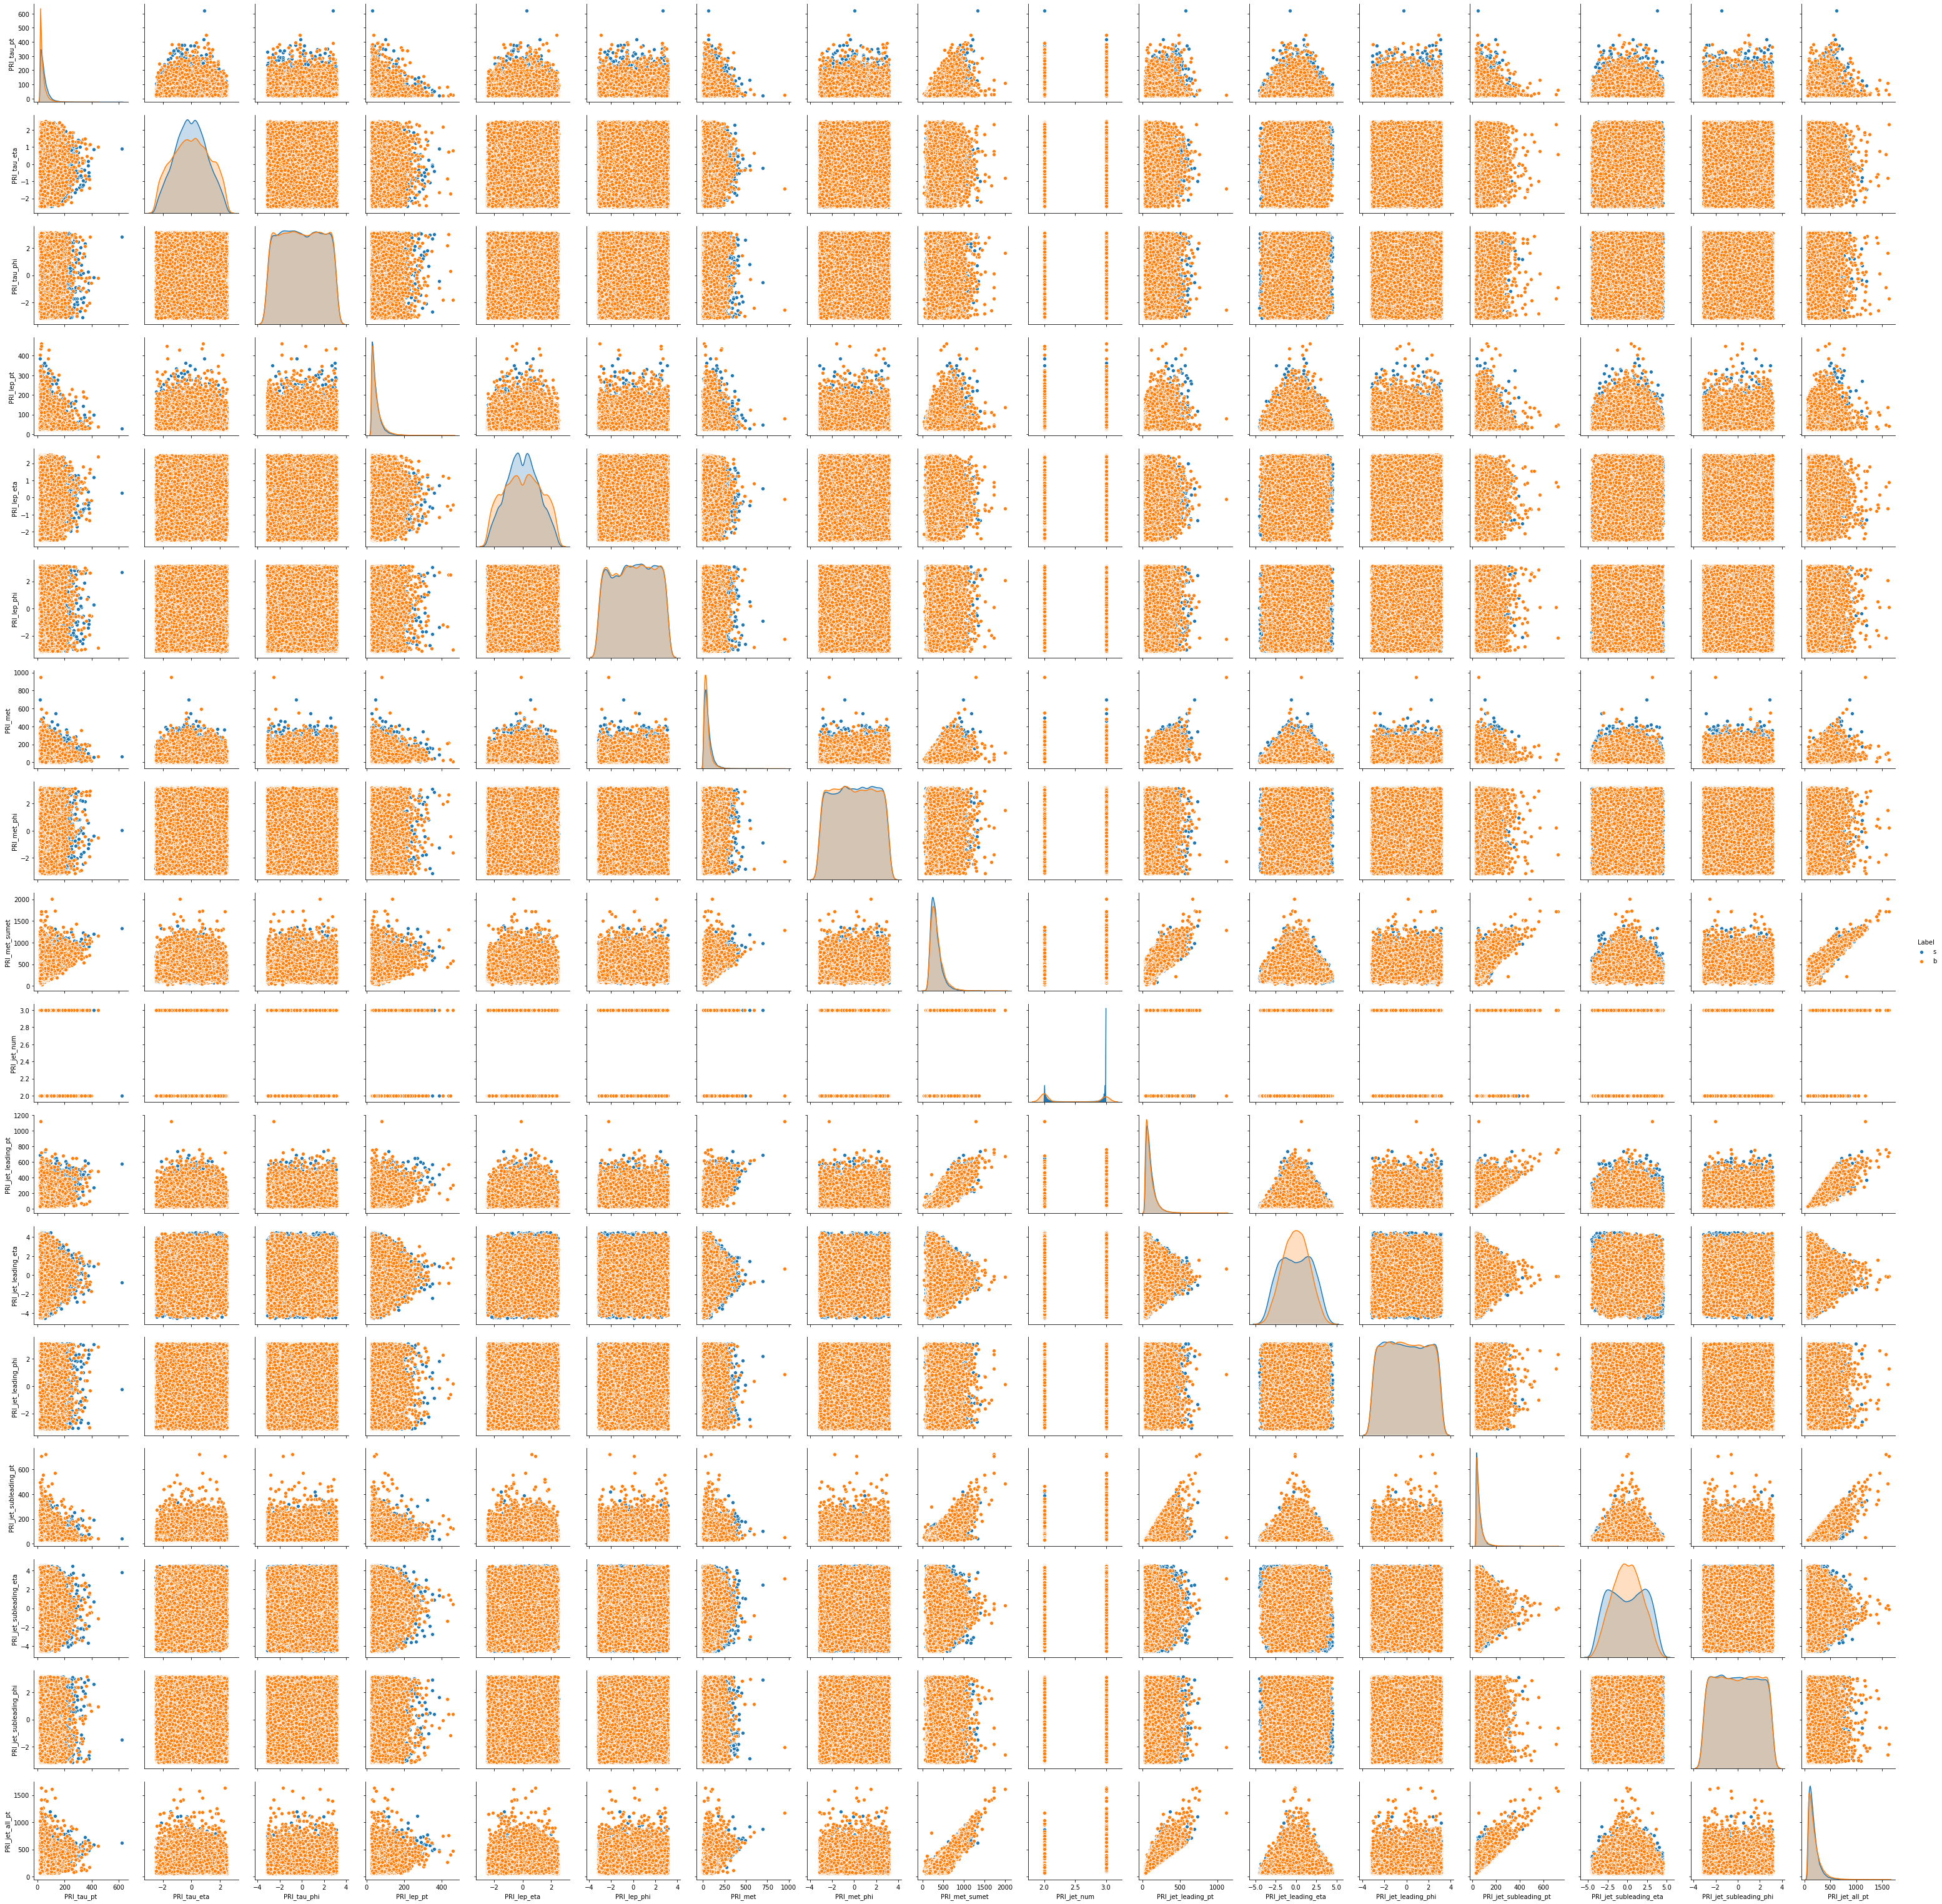

In [130]:
g = sns.pairplot(df.dropna(), vars=[x for x in df.columns if 'PRI_' in x], hue='Label')

En la imagen superior se muestra un *pair plot* de las variables *raw* (las columnas identificadas con *PRI*). Esta gráfica muestra por un lado los *scatter plot* de todas las columnas contra todas las columnas y en la diagonal la distribución de la columna en cuestión. Además, en color naranja se tienen los valores para la clase **b&nbsp;** y en azul para la clase **s&nbsp;**. En esta gráfica se puede observar lo siguiente:
* Las variables cuya distribución es uniforme se identifican mas facilmente que en el *violin plot* (*PRI_jet_subleading_phi* p.e.)
* Se puede ver que hay cierta correlación entre variables como *PRI_met_sumet* y *PRI_get_all_pt* y otras en las que no hay correlación como *PRI_jet_subleading_phi* y *PRI_tau_eta*.
* Hay variables binarias como *PRI_jet_num*.
* En ningún *scatter plot* se puede hacer una diferenciación clara de la clase.

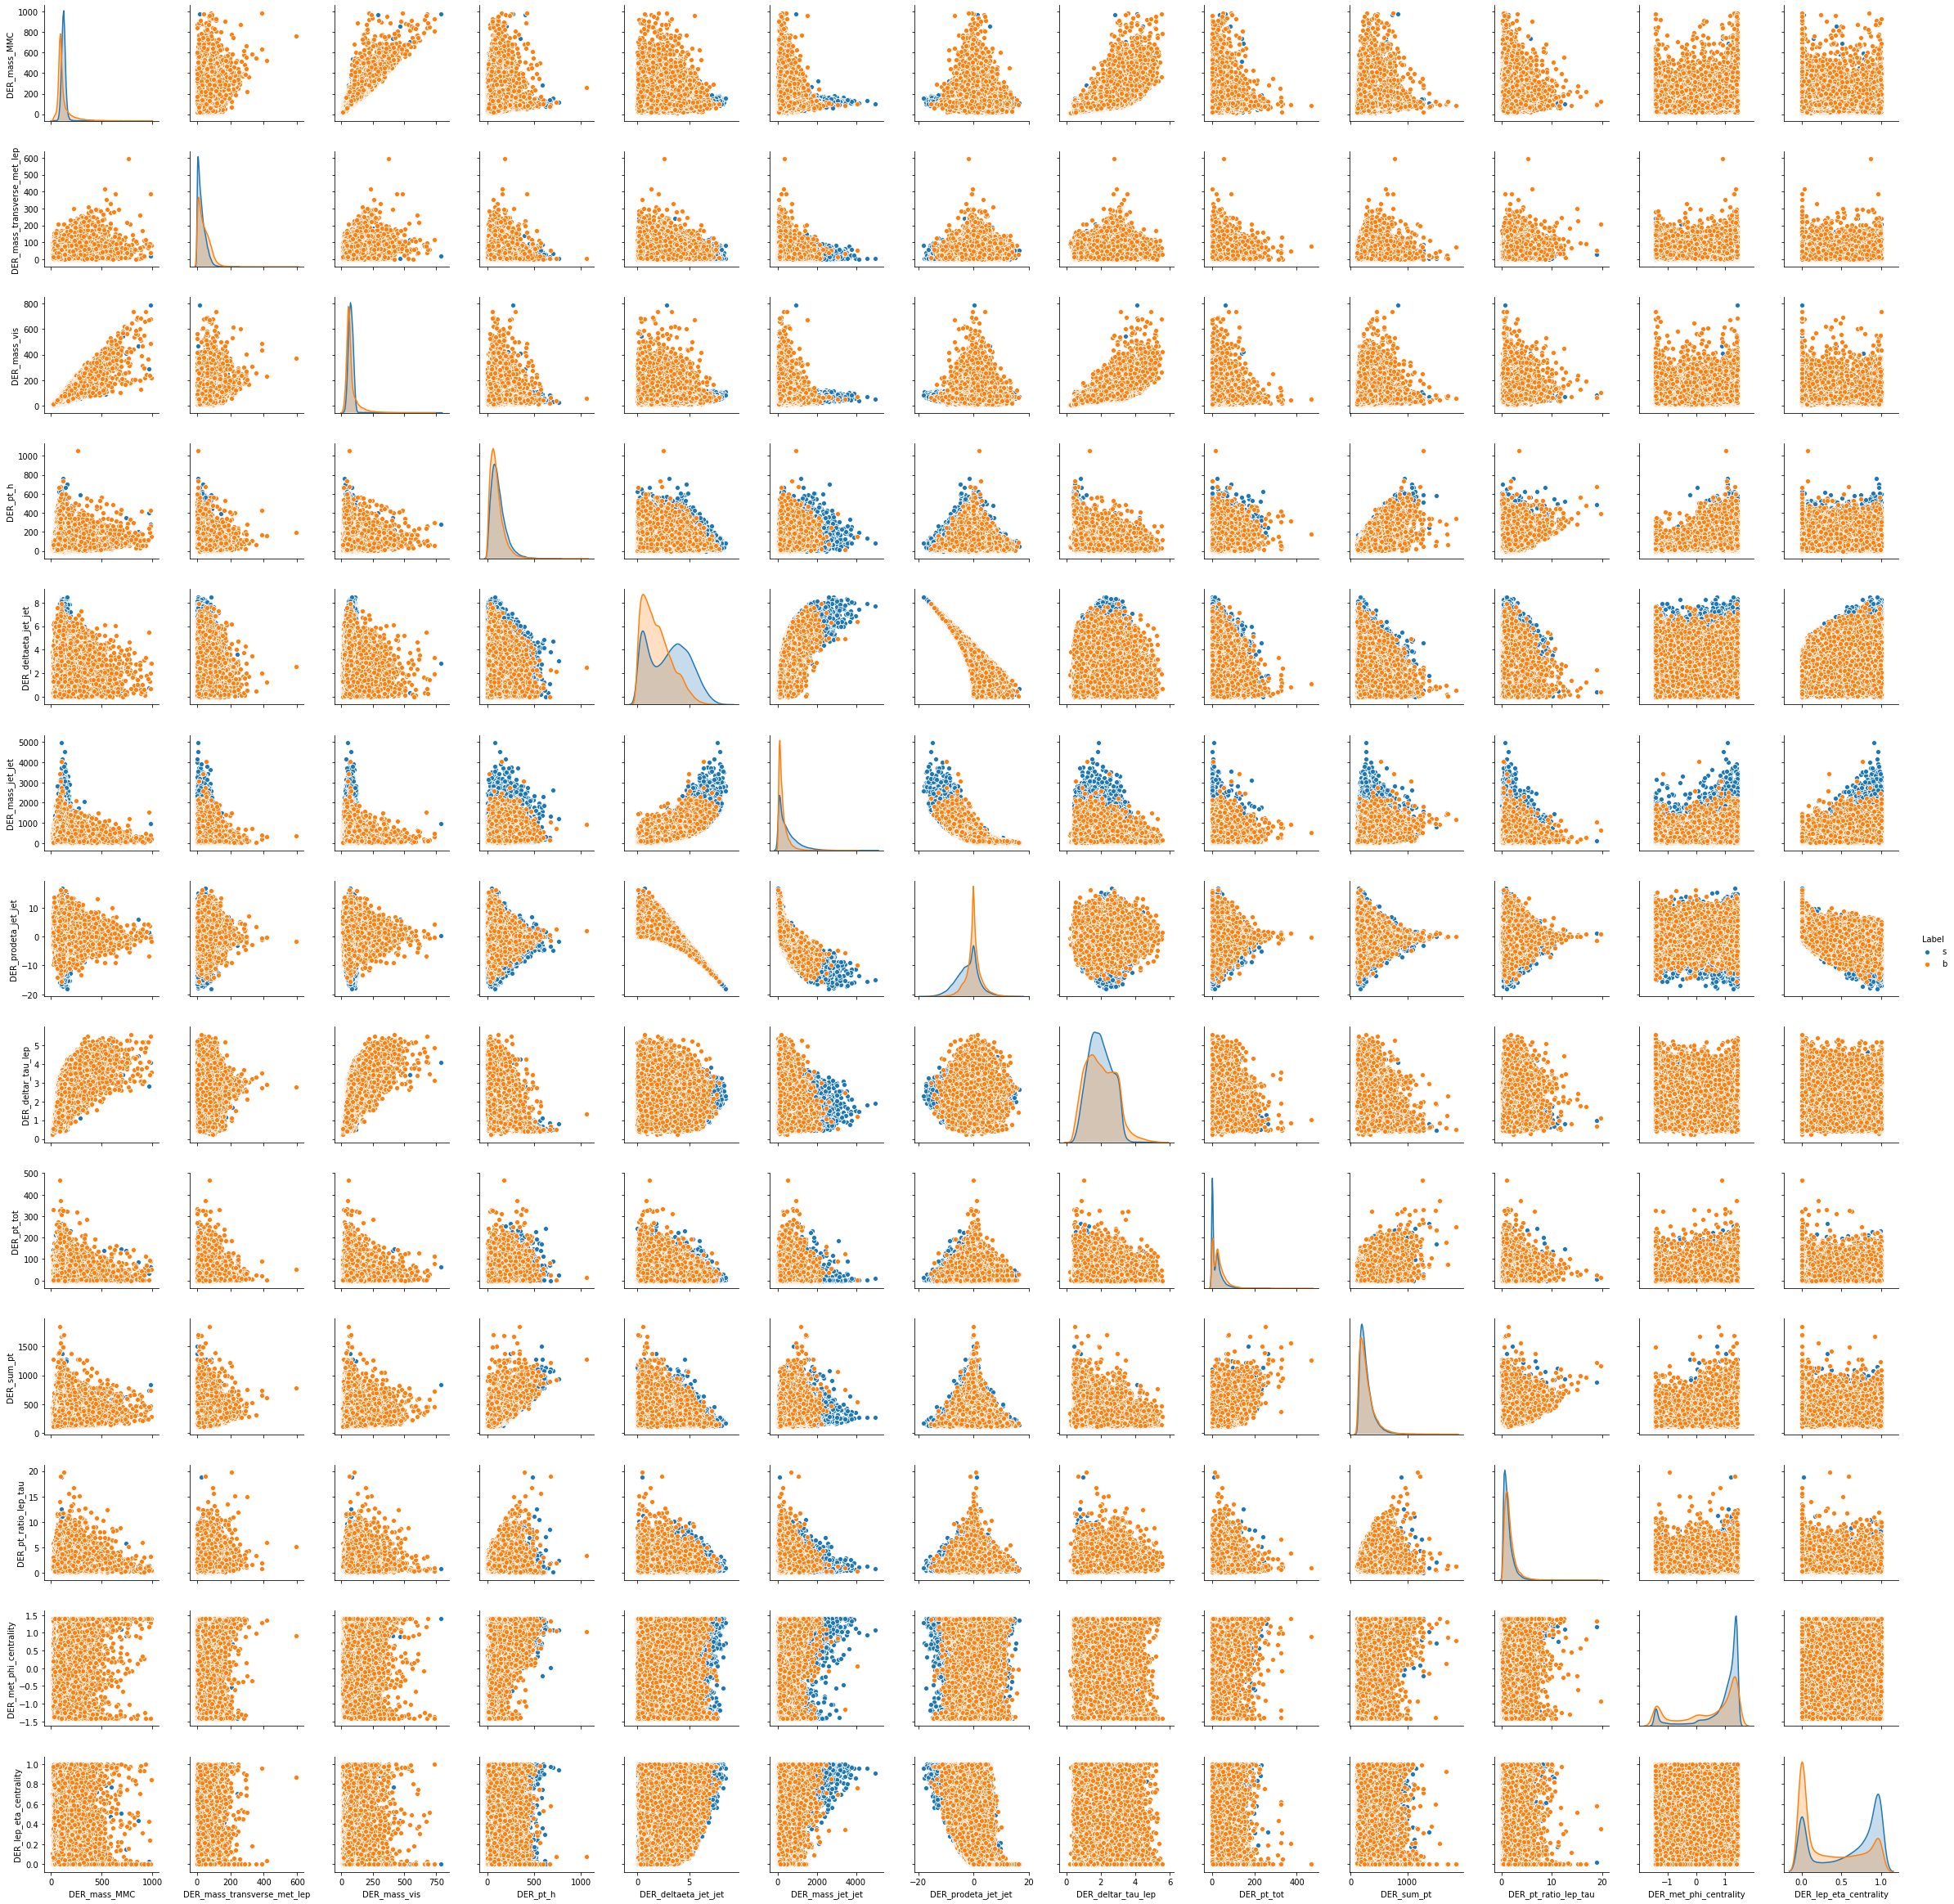

In [131]:
g = sns.pairplot(df.dropna(), vars=[x for x in df.columns if 'DER_' in x], hue='Label')

En la imagen superior se muestra un *pair plot* de las variables derivadas de las *raw* (las columnas identificadas con *DER*). En esta gráfica se puede observar lo siguiente:
* No hay ninguna columna cuya distribución sea uniforme.
* Se puede ver que hay cierta correlación entre variables como *DER_mass_vis* y *DER_mass_MMC* y otras en las que no hay correlación como *DER_lep_eta_centrality* y *DER_met_phi_centrality*.
* No hay variables binarias.
* Se puede hacer una diferenciación clara de la clase en algunos *scatter plot* como *DER_prodeta_jet_jet* y *DER_mass_jet_jet*.

## 3. Limpieza de los datos y valores extremos

Limpiaremos los párametros que no sean útiles para el estudio, reacondicionaremos los que sean necesarios y exploraremos los valores extremos.

### A. Limpieza de datos

Se eliminan aquellos parámetros que no son válidos o no aportan información al estudio identificados en el punto anterior. A estos parametros hay que sumarle *EventId* y *Weight* que ya fueron eliminados anteriormente.

In [132]:
to_drop = [
    'PRI_tau_phi',
    'PRI_lep_phi',
    'PRI_met_phi',
    'PRI_jet_leading_phi',
    'PRI_jet_subleading_phi',
]
df.drop(to_drop, axis=1, inplace=True)

Transformamos la columna *Label* a binario.

In [133]:
df['Label'] = df.Label.apply(lambda x: 1 if x is 'b' else 0)

El conjunto de datos contiene numerosos valores a nulo, que necesitan o bien ser reemplazados por un valor o bien eliminados. En este caso dado el gran numero de valores nulos por cada columna se ha decidido sustituirlos. De entre las técnicas recomendadas para realizar la sustitución, la mejor sin duda es utilizar la regresión lineal. En este caso, por cada columna que presenta valores nulos, se ha entrenado un regresor lineal a partir de los datos no nulos para obtener los valores con los que sustituirlos.

In [134]:
with_na = df.columns[df.isna().any()].values
without_na = df.columns[~df.isna().any()].values

In [135]:
for na_column in tqdm.tqdm(with_na):
    X = df.dropna(subset=[na_column])[without_na].values
    y = df.dropna(subset=[na_column])[na_column].values
    model = linear_model.LinearRegression().fit(X, y)
    df[na_column] = df.apply(lambda row: model.predict([row[without_na]])[0] if np.isnan(row[na_column]) else row[na_column], axis=1)

100%|██████████| 9/9 [12:15<00:00, 81.77s/it]


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 26 columns):
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           250000 non-null float64
DER_mass_jet_jet               250000 non-null float64
DER_prodeta_jet_jet            250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_lep_pt                     250000 non-null float64
PRI_lep_e

Como se puede ver ya no hay valores nulos en nuestro conjunto de datos.

El siguiente paso es detectar y eliminar *outliers* en nuestro dataset.

### B. Identificación y tratamiento de valores extremos

In [137]:
columns = [x for x in df.columns if x != 'Label']
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
df_final = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_final.shape)

(147421, 26)


El método elegido para detectar y eliminar los *outliers* es el metodo intercuartílico. Aplicar este método nos deja un total de 147421 filas (se han eliminado mas de 100000 filas con *outliers*).

In [204]:
df_final.to_csv(path_or_buf='.\df_final.csv', index=False)

## 4. Análisis de los datos

### A. Selección de los grupos de datos

Todas la variables de nuestro conjunto de datos son cuantitativas y todas pueden influir en saber si es un boson de Higgs o no, por eso tomaremos todas las columnas restantes como un solo grupo.

### B. Normalidad y homogeneidad de la varianza

Primero comprobaremos si la distribución de las variables es normal.

In [165]:
for col in df_final.columns:
    print(col)
    print(scipy.stats.anderson(df_final[col], dist='norm'))

DER_mass_MMC
AndersonResult(statistic=98.5481432141969, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
DER_mass_transverse_met_lep
AndersonResult(statistic=1251.787850568886, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
DER_mass_vis
AndersonResult(statistic=275.1965640685812, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
DER_pt_h
AndersonResult(statistic=4894.509780603519, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
DER_deltaeta_jet_jet
AndersonResult(statistic=4815.993620498542, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
DER_mass_jet_jet
AndersonResult(statistic=5268.474837162474, critical_values=array([0.576, 0.656, 0.787, 0.

Como se puede ver en los resultados de la prueba de normalidad de Anderson-Darling, en todas las variables los statistic test son mayores que los critical values por lo tanto no siguen una distribución normal.

Ahora comprobaremos la homogeneidad de la varianza con el test de Fligner-Killeen.

In [166]:
for col in df_final.columns:
    if col != 'Label':
        print(col)
        print(scipy.stats.fligner(df_final['Label'], df[col]))

DER_mass_MMC
FlignerResult(statistic=18182.64433489327, pvalue=0.0)
DER_mass_transverse_met_lep
FlignerResult(statistic=62619.96998300417, pvalue=0.0)
DER_mass_vis
FlignerResult(statistic=17013.9791803394, pvalue=0.0)
DER_pt_h
FlignerResult(statistic=96846.33869801769, pvalue=0.0)
DER_deltaeta_jet_jet
FlignerResult(statistic=204598.00452110157, pvalue=0.0)
DER_mass_jet_jet
FlignerResult(statistic=204598.00452110157, pvalue=0.0)
DER_prodeta_jet_jet
FlignerResult(statistic=204598.00452110157, pvalue=0.0)
DER_deltar_tau_lep
FlignerResult(statistic=17500.93108279067, pvalue=0.0)
DER_pt_tot
FlignerResult(statistic=115873.66705675346, pvalue=0.0)
DER_sum_pt
FlignerResult(statistic=26658.525038467647, pvalue=0.0)
DER_pt_ratio_lep_tau
FlignerResult(statistic=24094.271884370457, pvalue=0.0)
DER_met_phi_centrality
FlignerResult(statistic=204598.00452110157, pvalue=0.0)
DER_lep_eta_centrality
FlignerResult(statistic=204598.00452110157, pvalue=0.0)
PRI_tau_pt
FlignerResult(statistic=16171.17702679

Puesto que todos los p-valor son 0 (menores que 0.05) se acepta que ninguna columna es homogenea con la columna Label.

### C. Pruebas estadisticas

En primer lugar haremos un análisis de correlación entre las distintas variables para ver cual influye más en la variable Label, ya que hemos comprobado que estas no siguen una distribución normal.

In [167]:
for col in df_final.columns:
    if col != 'Label':
        print(col)
        print(scipy.stats.spearmanr(df_final['Label'], df_final[col]))

DER_mass_MMC
SpearmanrResult(correlation=-0.29218521887422694, pvalue=0.0)
DER_mass_transverse_met_lep
SpearmanrResult(correlation=0.415623597374044, pvalue=0.0)
DER_mass_vis
SpearmanrResult(correlation=-0.25673318331054545, pvalue=0.0)
DER_pt_h
SpearmanrResult(correlation=-0.09242742652245078, pvalue=5.091463866462e-277)
DER_deltaeta_jet_jet
SpearmanrResult(correlation=-0.7361986888714129, pvalue=0.0)
DER_mass_jet_jet
SpearmanrResult(correlation=-0.7202372035135184, pvalue=0.0)
DER_prodeta_jet_jet
SpearmanrResult(correlation=0.7478176360611252, pvalue=0.0)
DER_deltar_tau_lep
SpearmanrResult(correlation=-0.23827247938606516, pvalue=0.0)
DER_pt_tot
SpearmanrResult(correlation=-0.03432294554723078, pvalue=1.1107532293064396e-39)
DER_sum_pt
SpearmanrResult(correlation=-0.19304801590941648, pvalue=0.0)
DER_pt_ratio_lep_tau
SpearmanrResult(correlation=0.32022598070406366, pvalue=0.0)
DER_met_phi_centrality
SpearmanrResult(correlation=-0.13373680170020455, pvalue=0.0)
DER_lep_eta_centrality


Como se puede observar las variables que más correlación tienen con Label son DER_deltaeta_jet_jet (-0.5386173764979256), DER_mass_jet_jet (-0.5262585853846985), DER_prodeta_jet_jet (0.5413863257147407) y DER_lep_eta_centrality (-0.5463095548254712).

Planteamos ahora la hipótesis nula sobre todas las variables de que es más probable que sea un boson de Higgs cuanto mayor sea el valor de esta, para ello utilizamos el test no paramétrico de Mann-Whitney.

In [168]:
boson = df_final[df_final['Label'] == 1]
no_boson = df_final[df_final['Label'] == 0]
for col in df_final.columns:
    if col != 'Label':
        print(col)
        print(scipy.stats.mannwhitneyu(boson[col], no_boson[col], alternative='less'))

DER_mass_MMC
MannwhitneyuResult(statistic=1427615162.5, pvalue=0.0)
DER_mass_transverse_met_lep
MannwhitneyuResult(statistic=3454725287.5, pvalue=1.0)
DER_mass_vis
MannwhitneyuResult(statistic=1529147071.5, pvalue=0.0)
DER_pt_h
MannwhitneyuResult(statistic=1999706148.5, pvalue=3.790999538343598e-276)
DER_deltaeta_jet_jet
MannwhitneyuResult(statistic=155994662.5, pvalue=0.0)
DER_mass_jet_jet
MannwhitneyuResult(statistic=201707131.5, pvalue=0.0)
DER_prodeta_jet_jet
MannwhitneyuResult(statistic=4406103518.5, pvalue=1.0)
DER_deltar_tau_lep
MannwhitneyuResult(statistic=1582017221.0, pvalue=0.0)
DER_pt_tot
MannwhitneyuResult(statistic=2166112922.5, pvalue=5.8419717708419e-40)
DER_sum_pt
MannwhitneyuResult(statistic=1711536503.0, pvalue=0.0)
DER_pt_ratio_lep_tau
MannwhitneyuResult(statistic=3181513685.5, pvalue=1.0)
DER_met_phi_centrality
MannwhitneyuResult(statistic=1881452817.0, pvalue=0.0)
DER_lep_eta_centrality
MannwhitneyuResult(statistic=126927124.0, pvalue=0.0)
PRI_tau_pt
MannwhitneyuR

Vemos que para DER_mass_MMC, DER_mass_vis, DER_pt_h, DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_deltar_tau_lep, DER_pt_tot, DER_sum_pt, DER_met_phi_centrality, DER_lep_eta_centrality, PRI_tau_pt, PRI_lep_eta, PRI_met_sumet, PRI_jet_num, PRI_jet_leading_pt, PRI_jet_subleading_pt y PRI_jet_all_pt están por debajo del valor de significación 0.05 por lo que podemos decir que la variable Label influye sobre ellas y podemos utilizarlas para saber si es o no un boson de Higgs.

Por último crearemos un modelo de regresión lineal para poder predecir con los valores obtenidos si es un boson de Higgs o no.

In [192]:
X = df_final[:-100000].drop(df.columns.difference(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality']), axis=1).values
y = df_final[:-100000].drop(df.columns.difference(['Label']), axis=1).values
model1 = linear_model.LinearRegression().fit(X, y)
model1.coef_

array([[ 0.66004439, -0.00094562,  0.60706121, -0.68803435]])

In [193]:
X = df_final[:-100000].drop(['Label'], axis=1).values
y = df_final[:-100000].drop(df.columns.difference(['Label']), axis=1).values
model2 = linear_model.LinearRegression().fit(X, y)
model2.coef_

array([[-1.21053667e-04, -8.46092068e-05,  1.28371311e-03,
        -3.02257748e-03,  5.92935852e-01, -3.61433163e-03,
         2.95950577e-01, -1.30738713e-01, -3.17106739e-03,
         3.77321542e+00,  1.39306265e-02,  5.64128151e-02,
        -5.88183644e-01, -3.77295219e+00, -2.69493856e-03,
        -3.77379312e+00,  2.90553652e-03,  9.99280403e-05,
        -1.42760958e-03, -6.11454463e-01, -1.99260595e-03,
         1.73729808e-03, -6.80592045e-03,  2.96937954e-03,
        -3.76209933e+00]])

En el primer modelo solo utilizamos las variables con mejor correlación y en el segundo modelo se utilizán todas las variables, se puede cconprobar por los coeficientes de determinación que el modelo con todas las variables tiene mejores coeficientes para las variable con más correlación que el otro. A continuación se muestra una predicción con el segundo modelo.

In [194]:
model2.predict(df_final[-100000:].drop(['Label'], axis=1).values)

array([[1.02652742],
       [1.00823689],
       [0.03793159],
       ...,
       [0.03336699],
       [0.96753294],
       [0.99070404]])

## 5. Representación resultados

A continuación se mostrarán las primeras líneas de la tabla con la limpieza de datos.

In [200]:
df_final.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
1       160.937                       68.768       103.235    48.146   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   
5        89.744                       13.550        59.149   116.344   
8       105.594                       50.559       100.989     4.288   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
1              2.608276        281.772526            -0.704403   
3              2.851638        343.723163            -0.954537   
4              2.947310        343.280133            -1.067852   
5              2.636000        284.584000            -0.540000   
8              2.804362        337.313141            -0.911088   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_lep_eta  PRI_met  \
1               3.473       2.078     125.157  ...        0.501   44.704   
3               3.310       0.414      75.968  ...       -0.522   31.082   
4               3.891      16.405      57.983  ...        0.798    2.723   
5               1.362      61.619     278.876  ...       -0.884   40.735   
8               2.904       4.288      65.333  ...        0.210   37.791   

   PRI_met_sumet  PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
1        164.546            1           46.226000             0.725000   
3         86.062            0           43.990373            -0.431245   
4         53.131            0           41.832560            -0.198788   
5        282.849            3           90.547000            -2.412000   
8        129.804            0           44.652574             0.451472   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_all_pt  Label  
1              33.611280                0.355616          46.226      1  
3              32.713669               -0.377518          -0.000      1  
4              31.297866               -0.226183           0.000      1  
5              56.165000                0.224000         193.660      1  
8              33.146472                0.376848           0.000      1  

[5 rows x 26 columns]

In [201]:
corr = df_final.corr()
corr.style.background_gradient(cmap='coolwarm')

En la tabla superior se pueden ver las correlaciones de todas las variables, no solo con la columna Label.

## 6. Resolución del problema

Con los resultados obtenidos se puede concluir que las correlaciones entre las variables y la columna Label no son muy altas, pero al tener un gran número de ellas y tener influencia la variable Label en una gran cantidad de ellas hace que el modelo de predicción sea bastante exacto, pudiendo determinar si una particula es o no boson de Higgs con un alto porcentaje de acierto, esto quiere decir que se ha podido resolver el problema al que nos enfrentabamos. 

## Datos de la práctica

Práctica realizada por Emilio José Lucas Marcos (ejlm)

| Contribuciones              | Firma |
|-----------------------------|-------|
| Investigación previa        | ejlm  |
| Redacción de las respuestas | ejlm  |
| Desarrollo código           | ejlm  |